## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [2]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_study_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_df.duplicated(['Mouse ID','Timepoint'])

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_df["Mouse ID"].value_counts()

g989    13
w151    10
i738    10
m546    10
k862    10
        ..
t573     1
x226     1
o848     1
b447     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df=mouse_study_df.dropna(how='any')

In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_study_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
#SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumorv_mean = clean_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumorv_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [13]:
tumorv_median = clean_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumorv_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [14]:
tumorv_variance = clean_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumorv_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [15]:
tumorv_stde = clean_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumorv_stde

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [16]:
tumorv_sem = clean_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
tumorv_sem 

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [18]:
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": tumorv_mean, "Median": tumorv_median, "Variance": 
                           tumorv_variance, "Standard Deviation": tumorv_stde, "SEM": tumorv_sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
#SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

## Bar and Pie Charts

In [70]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
ms_df = clean_mouse_study_df.groupby('Drug Regimen')['Mouse ID'].count().reset_index()
ms_df.head()

,Drug Regimen,Mouse ID
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186


In [77]:
unique = ms_df["Mouse ID"].nunique()
unique

8

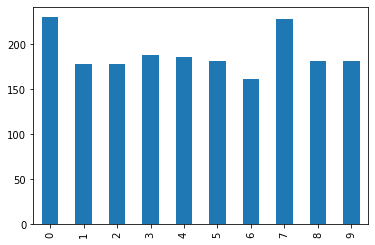

In [78]:
total_mice = ms_df["Mouse ID"].plot.bar()

In [85]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
unique_df = ms_df["Mouse ID"].unique()
unique_df

array([230, 178, 188, 186, 181, 161, 228, 182])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

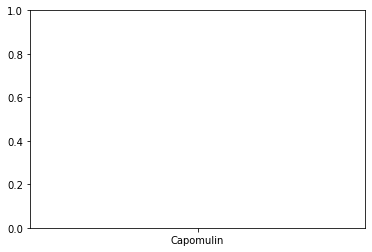

In [95]:
#Set the x_axis to be the total number of unqiue mice testes on each 
drug_regimen = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 
                'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
mouse_ID = [230, 178, 188, 186, 181, 161, 228, 182]

plt.bar(drug_regimen, mouse_ID)

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
ms_distribution_df = clean_mouse_study_df.groupby('Mouse ID')['Sex'].count().reset_index()
ms_distribution_df.head()

,Mouse ID,Sex
0,a203,10
1,a251,10
2,a262,10
3,a275,10
4,a366,7


In [97]:
groupby_gender = ms_distribution_df.groupby(["Mouse ID","Sex"])
groupby_gender

mouse_gender_df = pd.DataFrame(groupby_gender.size())

In [98]:
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

In [99]:
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

In [100]:
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]
mouse_gender

,Total Count,Percentage of Sex
Sex,,
1,12,4.819277
2,15,6.024096
3,16,6.425703
4,12,4.819277
5,11,4.417671
6,12,4.819277
7,17,6.827309
8,11,4.417671
9,12,4.819277


In [112]:
#plot = name of the data frame .plot.pie (sumplots true)
colors = ['blue', 'red']
explode = (0.1, 0)
plot = mouse_gender.plot.pie('subplots= "Total Count"')

TypeError: pie() takes 1 positional argument but 2 were given

In [113]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
ms_distribution_df = clean_mouse_study_df.groupby('Mouse ID')['Sex'].count().reset_index()
ms_distribution_df.head()

,Mouse ID,Sex
0,a203,10
1,a251,10
2,a262,10
3,a275,10
4,a366,7


([<matplotlib.patches.Wedge at 0x7fd34efecc70>,
 [Text(-0.7771287477781478, -0.9143691319028482, 'Female'),
  Text(0.7123680187966356, 0.8381717042442774, 'Male')],
 [Text(-0.45332510287058614, -0.5333819936099948, '49.8%'),
  Text(0.3885643738890739, 0.457184565951424, '50.2%')])

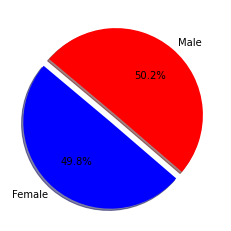

In [116]:
labels = ["Female","Male"]
colors = ['blue', 'red']
sizes = [49.799197,50.200803]
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
